## Assignment 2: Apply TF-IDF to the Inaugural Corpus 
Our second assignment will have us write code to 
1. Define or augment a set of stopwords for this problem
2. Construct a document-by-term matrix (documents will be rows, terms will be columns), along with a vocabulary while controlling for stopwords
3. Write functions to comput TF-IDF and apply those to the document-by-term matrix
4. Find the closest historic inaugural address to the 2017 address by President Trump
5. Learn to use the PCA transformation and plot the inaugural address along the first two principal components

This assignment is to be done individually. Your code should be your own (with the exception of question 5, for which you're free to get some help from the web).

**Due Date: 2020-09-20 5 pm ET**

Please submit your completed assignment through GradeScope. You should submit a PDF of your notebook with all output.

In [8]:
import re
import math
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.corpus import inaugural


In [9]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

porter    = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
wnl       = nltk.WordNetLemmatizer()

In [10]:
inaugural.fileids()[:4]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt']

In [5]:
inaugural.words(inaugural.fileids())


['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [6]:
stop_words = set(stopwords.words('english'))

### 1. Stopwords

**Update stopwords once you've had a chance to explore the text**

Remove all punctuation and strange unicode characters, and anything else you think might be extraneous

In [7]:
Stopword_list = ['-', '.',"'", '?', '!', '--', '?', '"','--','."', ')','(',"'s", ';',"$",'";', '"?', "$",",", ',"', '."', ')', '.)', '...', '....', '.¡¨', '000','1','100', '120', '125', '"', ')', ')', ',', '0', '1', '13', '14th', '15th', '16', "),",'1774', '1776', '1778', '1780', '1787', '1789', '1790', '1800', '1801', '1812', '1815', '1816', '1817', '1818', '1826', '1850', '1861', '1868', '1873', '1880', '1886', '1890', '1893', '1896', '1897', '1898', '1899', '18th', '1907', '1917', '1933', '1941', '1945', '1963', '1972', '1980', '1984', '19th', '2', '20', '200', '200th', '2017', '20th', '21st', '225', '25','3','30','30th','3d','4','40','400','41','48','4th','5','50', '50th', '6', '60', '67', '6th','7', '8', '9', ':', '?"', '[', ']', ]
stop_words.update(Stopword_list)


---
### 2. Read each inaugural address into an Pandas DataFrame

**2.1 Create a vocabulary as a set of all unique stemmed terms in the corpus**

In [12]:
vocab = set()

In [13]:
for i in inaugural.fileids():
    vocab.update([porter.stem(t.lower()) for t in nltk.corpus.inaugural.words(i) if t.lower() not in stop_words])


**2.2 Use your vocabulary now to read each inaugural address into a dataframe**

Each row of the dataframe should represent a document (one of the addresses). It may be handy at this time to also track the size (length) of each document, since you'll need this later when computing TF.

You should ignore the README file. Hint: use `inaugural.fileids()`.

In [14]:
df = pd.DataFrame(index = nltk.corpus.inaugural.fileids(), columns = vocab, dtype = float)
df = df.fillna(0)

for inaug in inaugural.fileids():
    for t in nltk.corpus.inaugural.words(inaug): 
        w = porter.stem(t.lower())
        if w in vocab:
            df.at[inaug,w] += 1


In [15]:
sizearr = []

for inaug in inaugural.fileids():
    new = []
    for t in nltk.corpus.inaugural.words(inaug): 
        w = porter.stem(t.lower())
        if w in vocab:
            new.append(w)
    sizearr.append(len(new))
        


In [16]:
df.shape

(58, 5338)

---
### 3. Compute TF-IDF for the document-term matrix ###

**3.1. Write a function to compute term frequency (TF) for each document**

Please write your own code here, and resist the urge to rely on google for your answer.

In [17]:
def computetf(wordvec,doclen):
    tfreq = wordvec / doclen
    return tfreq     

**3.2 Write a function to comput inverse document frequency**



In [19]:
import math 

dictidf = {}

print(float(df.isin([0]).sum()['youth']))
def computeidf(df):
    N = df.shape[0]
    dfvocab = df.columns
    for word in dfvocab:
        dictidf[word] = math.log(N / ( N - float(df.isin([0]).sum()[word])))
    return dictidf


53.0


In [26]:
#computeidf(df)

**Create a new dataframe and populate it with the TF-IDF values for each document-term combination**

The functions your write above should work with the below code snippet.

In [20]:
newdf = pd.DataFrame()
idfdict = computeidf(df)
cols = df.columns
counter = 0
for index, row in df.iterrows():
    newrow = computetf(row,sizearr[counter])
    for c in cols:
        newrow[c] = newrow[c]*idfdict[c]
    newdf = newdf.append(newrow)
    counter += 1
    
    

In [21]:
newdf.shape

(58, 5338)

---
### 4. Using TF-IDF values, find and rank order the 3 closest inaugural addresses to Donald Trump's 2017 address, measured by cosine similarity

In [17]:
# President Trump's address is 57 (0-indexed)
newdf.iloc[57,:].head(100)

abandon      0.000000
abat         0.000000
abdic        0.000000
abey         0.000000
abhor        0.000000
               ...   
affair       0.000942
affect       0.000000
affection    0.000000
affili       0.000000
affirm       0.000000
Name: 2017-Trump.txt, Length: 100, dtype: float64

**4.1 Create an array called dist that contains the cosine similarity distance between the 2017 inaugural address (called d1 below) and each of the inaugural addresses**

In [22]:
d1 = newdf.iloc[57,:]
dist = {}

for index,row in newdf.iterrows():
    trump_x = 0
    if (index == '2017-Trump.txt'):
        for i in row:
            trump_x = trump_x + (i*i)
        trump_x = math.sqrt(trump_x)
        

for index,row in newdf.iterrows():
    x = 0
    if (index != '2017-Trump.txt'):
        dot = np.dot(d1,row)
        for i in row:
            x = x + (i * i)
        x = math.sqrt(x)
        dist[index] = (dot/(x*trump_x)) 
        

**4.2 Find the 3 closest associated inaugural address, when measured by cosign similarity. Which one is the closest?**

In [19]:
{k: v for k, v in sorted(dist.items(), reverse=True, key=lambda item: item[1])}

{'1993-Clinton.txt': 0.21550935612294217,
 '1997-Clinton.txt': 0.2150051755816312,
 '2013-Obama.txt': 0.2146110035710023,
 '1969-Nixon.txt': 0.20061153405169074,
 '2009-Obama.txt': 0.19653190182025673,
 '1989-Bush.txt': 0.17567863678973705,
 '1981-Reagan.txt': 0.167648581722583,
 '1985-Reagan.txt': 0.15163820188391877,
 '2001-Bush.txt': 0.14808769202604324,
 '1973-Nixon.txt': 0.1393541033959192,
 '1957-Eisenhower.txt': 0.1120439703618146,
 '1961-Kennedy.txt': 0.10882966569210291,
 '1953-Eisenhower.txt': 0.1068375265931579,
 '1977-Carter.txt': 0.10475572809390814,
 '1937-Roosevelt.txt': 0.09974015719288304,
 '1921-Harding.txt': 0.09699903821384122,
 '1941-Roosevelt.txt': 0.09277371626566243,
 '1925-Coolidge.txt': 0.09209361051502471,
 '1913-Wilson.txt': 0.08723828449272053,
 '1965-Johnson.txt': 0.08616441032430808,
 '2005-Bush.txt': 0.08601020869744393,
 '1929-Hoover.txt': 0.08528235732742849,
 '1841-Harrison.txt': 0.07609357541762131,
 '1945-Roosevelt.txt': 0.07556471313548337,
 '1933-

---
### 5. Compute the first two principal components of the TF-IDF matrix, and plot each document along each of the PCA components
For this question, feel free to use google, stackoverflow, etc to help you compute the PCA (it's pretty easy, just one or two lines). Don't worry too much about the theory for now - we're going to discuss the Principal Component Decomposition later in the semester.

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
pca = PCA(n_components=2)
X = pca.fit_transform(newdf.fillna(0))


In [25]:
len(X)

58

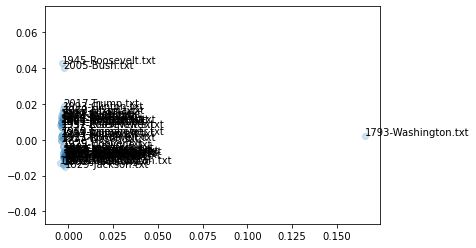

In [26]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.axis('equal');
for i in range(0,58):
    plt.text(X[i,0],X[i,1],inaugural.fileids()[i])